In [57]:

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from sklearn import preprocessing

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image
from pandas import read_csv
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
from sklearn.datasets import fetch_mldata, load_boston                                                                       
from sklearn.utils import shuffle                                                                                            
from sklearn.neighbors import KNeighborsClassifier                                                                           
from sklearn import metrics                                                                                                  
from sklearn import tree                                                                                                     
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor                                                       
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB                                                       
from sklearn.svm import SVC, LinearSVC , SVR                                                                                 
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression                                            
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor                                                    
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.cross_validation import KFold, train_test_split, cross_val_score                                                
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import Binarizer 
from sklearn.feature_selection import SelectFromModel
#plot tree for train set

from sklearn.externals.six import StringIO
import pydotplus
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [58]:
# Load dataset information
dt= pd.read_csv('Desktop/data/USIS-wamVer-2.csv')
#dt.head()
dt.shape

(2462, 10)

In [59]:
dt.head()

,1st_choice,2nd_choice,3rd_choice,ssc_or_olevel,hsc_or_alevel,medium,ssc_board,hsc_board,registered_program,target_dept
0,ARC-1,CSE-2,CS-3,4.8,4.50,eng,NaN,NaN,ARC,Architecture
1,ECE-1,EEE-2,CSE-3,5.0,4.08,ban,NaN,NaN,ECE,ElectricalandElectronicEngr
2,BIO-1,CSE-2,BBA-3,5.0,5.00,eng-ver,Dhaka,Dhaka,BIO,MNS
3,ARC-1,BIO-2,EEE-3,5.0,5.00,eng,NaN,NaN,BIO,MNS
4,ARC-1,LLB-2,NaN,4.6,NaN,eng,NaN,NaN,LLB,School_of_Law


In [60]:
# Load dataset information
dt_top= pd.read_csv('Desktop/USIS_topsis.csv')
#dt.head()
dt_top.shape

(2462, 12)

In [61]:
dt_top.head()

,1st_choice,2nd_choice,3rd_choice,ssc_or_olevel,hsc_or_alevel,medium,ssc_board,hsc_board,Credit Earned,CGPA,registered_program,target_dept
0,PHY-1,MAT-2,NaN,4.88,3.8,ban,Jessore,Jessore,83.5,3.67,ANT,ESS
1,ECO-1,BBA-2,ENG-3,5.00,5.0,ban,Dhaka,Dhaka,126.0,2.97,ANT,ESS
2,ANT-1,ECO-2,BBA-3,NaN,NaN,ban,NaN,NaN,12.0,3.23,ANT,ESS
3,ANT-1,ENG-2,LLB-3,5.00,4.1,ban,Dhaka,Dhaka,60.0,2.66,ANT,ESS
4,CSE-1,CS-2,EEE-3,5.00,5.0,ban,Dhaka,Dhaka,27.0,2.24,ANT,ESS


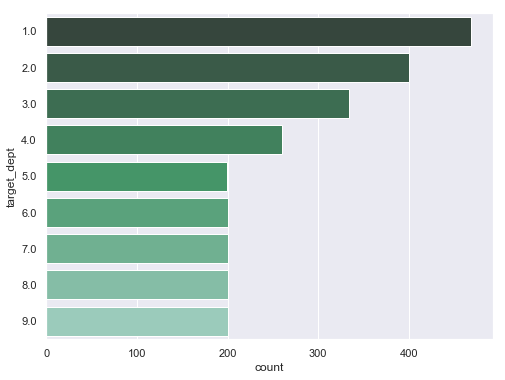

In [87]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(y="target_dept", data=dt, palette="BuGn_d")
plt.show()

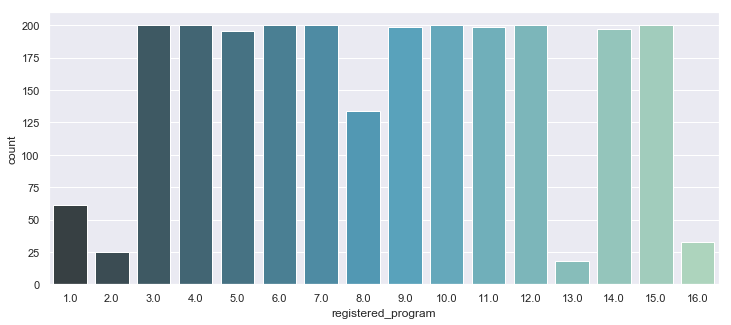

In [88]:
sns.set(rc={'figure.figsize':(12,5)})
sns.countplot(x="registered_program", data=dt, palette="GnBu_d");
plt.show()

In [62]:
#check how many unique values - method
# including empty val counted as a separate catagory
for col_name in dt.columns:
    if dt[col_name].dtypes == 'object':
        unique_cat = len(dt[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique catagories".format(
             col_name=col_name, unique_cat= unique_cat))

Feature '1st_choice' has 16 unique catagories
Feature '2nd_choice' has 17 unique catagories
Feature '3rd_choice' has 17 unique catagories
Feature 'medium' has 4 unique catagories
Feature 'ssc_board' has 12 unique catagories
Feature 'hsc_board' has 12 unique catagories
Feature 'registered_program' has 16 unique catagories
Feature 'target_dept' has 9 unique catagories


In [63]:
map_obj={"1st_choice":{"ANT-1":1,"APE-1":2,"ARC-1":3,"BBA-1":4,"BIO-1":5,"CS-1":6,"CSE-1":7,"ECE-1":8,"ECO-1":9,
                      "EEE-1":10,"ENG-1":11,"LLB-1":12,"MAT-1":13,"MIC-1":14,"PHR-1":15,"PHY-1":16}  ,
        "2nd_choice":{"ANT-2":1,"APE-2":2,"ARC-2":3,"BBA-2":4,"BIO-2":5,"CS-2":6,"CSE-2":7,"ECE-2":8,"ECO-2":9,
                      "EEE-2":10,"ENG-2":11,"LLB-2":12,"MAT-2":13,"MIC-2":14,"PHR-2":15,"PHY-2":16} ,
        "3rd_choice":{"ANT-3":1,"APE-3":2,"ARC-3":3,"BBA-3":4,"BIO-3":5,"CS-3":6,"CSE-3":7,"ECE-3":8,"ECO-3":9,
                      "EEE-3":10,"ENG-3":11,"LLB-3":12,"MAT-3":13,"MIC-3":14,"PHR-3":15,"PHY-3":16}    ,
        "registered_program":{"ANT":1,"APE":2,"ARC":3,"BBA":4,"BIO":5,"CS":6,"CSE":7,"ECE":8,"ECO":9,
                      "EEE":10,"ENG":11,"LLB":12,"MAT":13,"MIC":14,"PHR":15,"PHY":16}   ,
        "ssc_board":{"Barisal":1,"CBSE":2,"Chittagong":3,"Comilla":4,"Dhaka":5,"Dinajpur":6,"Jessore":7,
                     "Madrasah":8,"Others":9,"Rajshahi":10,"Sylhet":11},
        "hsc_board":{"Barisal":1,"CBSE":2,"Chittagong":3,"Comilla":4,"Dhaka":5,"Dinajpur":6,"Jessore":7,
                     "Madrasah":8,"Others":9,"Rajshahi":10,"Sylhet":11}    ,
        "medium":{"ban":1,"eng":2,"eng-ver":3,"madrasah":4},
        "target_dept":{"MNS":1,"ComputerSciandEngr":2,"ElectricalandElectronicEngr":3,"ESS":4,"ENH":5,
                      "Brac_Business_School":6,"School_of_Law":7,"Architecture":8,"Pharmacy":9}
        }
dt.replace(map_obj,inplace=True)
#
from sklearn.preprocessing import Imputer
imp= Imputer(missing_values= 'NaN', strategy='median', axis=0) 
imp.fit(dt)
dt= pd.DataFrame(data=imp.transform(dt),columns=dt.columns)

In [64]:
dt.head()

,1st_choice,2nd_choice,3rd_choice,ssc_or_olevel,hsc_or_alevel,medium,ssc_board,hsc_board,registered_program,target_dept
0,3.0,7.0,6.0,4.8,4.50,2.0,5.0,5.0,3.0,8.0
1,8.0,10.0,7.0,5.0,4.08,1.0,5.0,5.0,8.0,3.0
2,5.0,7.0,4.0,5.0,5.00,3.0,5.0,5.0,5.0,1.0
3,3.0,5.0,10.0,5.0,5.00,2.0,5.0,5.0,5.0,1.0
4,3.0,12.0,8.0,4.6,4.80,2.0,5.0,5.0,12.0,7.0


In [65]:
x = dt.drop('target_dept',1)
y = dt.target_dept
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.20)

In [66]:
X_train.shape

(1969, 9)

In [67]:
X_test.shape

(493, 9)

# Model accuracy score


In [68]:
sizes=[]
names = ["KNN", "Logistic Regression","Linear SVM",
         "Decision Tree", "Random Forest", "AdaBoost","Naive Bayes"]

classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(pred,y_test)
    print("-----",name,"-----")
    result = (score*100)
    sizes.append(result)
    print("Score: %.2f %%"%(score*100))
  

----- KNN -----
Score: 78.90 %
----- Logistic Regression -----
Score: 41.58 %
----- Linear SVM -----
Score: 86.00 %
----- Decision Tree -----
Score: 100.00 %
----- Random Forest -----
Score: 98.17 %
----- AdaBoost -----
Score: 33.27 %
----- Naive Bayes -----
Score: 66.94 %


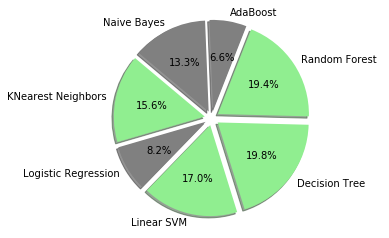

In [69]:
sizes=sizes
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'KNearest Neighbors','Logistic Regression', 'Linear SVM','Decision Tree', 'Random Forest', 'AdaBoost','Naive Bayes'

explode = (0.08, 0.08, 0.08, 0.08,0.08,0.08,0.08)
colors = ['lightgreen', 'grey', 'lightgreen', 'lightgreen','lightgreen','grey','grey']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140,colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# KNN


The accuracy of the knn classifier for k = 3 is 81%

The optimal number of neighbors is 1.


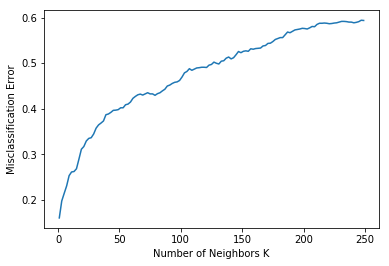

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = 3 is %d%%' % acc)
# ============================== parameter tuning =============================================
#k-fold cross validation
# creating odd list of K for KNN
myList = list(range(0,250))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cross validation scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [71]:
#					                            Part II
# =============================================================================================
# ================================ writing new KNN with optimal neighbor========================
def train(X_train, y_train):
	# do nothing 
	return

def predict(X_train, y_train, x_test, k):
	# create list for distances and targets
	distances = []
	targets = []

	for i in range(len(X_train)):
		# first we compute the euclidean distance
		distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
		# add it to list of distances
		distances.append([distance, i])

	# sort the list
	distances = sorted(distances)

	# make a list of the k neighbors' targets
	for i in range(k):
		index = distances[i][1]
		#print(y_train[index])
		targets.append(y_train[index])

	# return most common target
	return Counter(targets).most_common(1)[0][0]

def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
	# check if k is not larger than n
	if k > len(X_train):
		raise ValueError
		
	# train on the input data
	train(X_train, y_train)

	# predict for each testing observation
	for i in range(len(X_test)):
		predictions.append(predict(X_train, y_train, X_test[i, :], k))

In [72]:

# ============================== testing  KNN ============================================= 
predictions = []

kNearestNeighbor(X_train, y_train, X_test, predictions, 1)
predictions = np.asarray(predictions)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions) * 100
print('\nThe accuracy of this classifier is %d%%' % accuracy)


print('Can\'t have more neighbors than training samples!')

TypeError: unhashable type: 'slice'

# decision tree

In [73]:

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
#feature scaling
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#param dist

param_dist = {"max_depth":[3,None],
              "min_samples_leaf":randint(1,9),
              "max_leaf_nodes":[2,None],
              "criterion":["gini","entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)


tree_cv.fit(X_train,y_train)

print("tuned decision tree parameters: {}".format(tree_cv.best_params_))
print("best score is {}".format(tree_cv.best_score_))

y_pred = tree_cv.predict(X_test)

tuned decision tree parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4}
best score is 1.0


In [74]:

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import Binarizer 
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

X1 = dt.drop('target_dept',1)
y1 = dt.target_dept

x_names= ['1st_choice', '2nd_choice', '3rd_choice', 'ssc_or_olevel',
       'hsc_or_alevel', 'medium', 'ssc_board', 'hsc_board',
       'registered_program']
y_names=['MNS','ComputerSciandEngr','ElectricalandElectronicEngr','ESS',
        'Architecture','School_of_Law',
        'Pharmacy','Brac_Business_School','ENH'] 



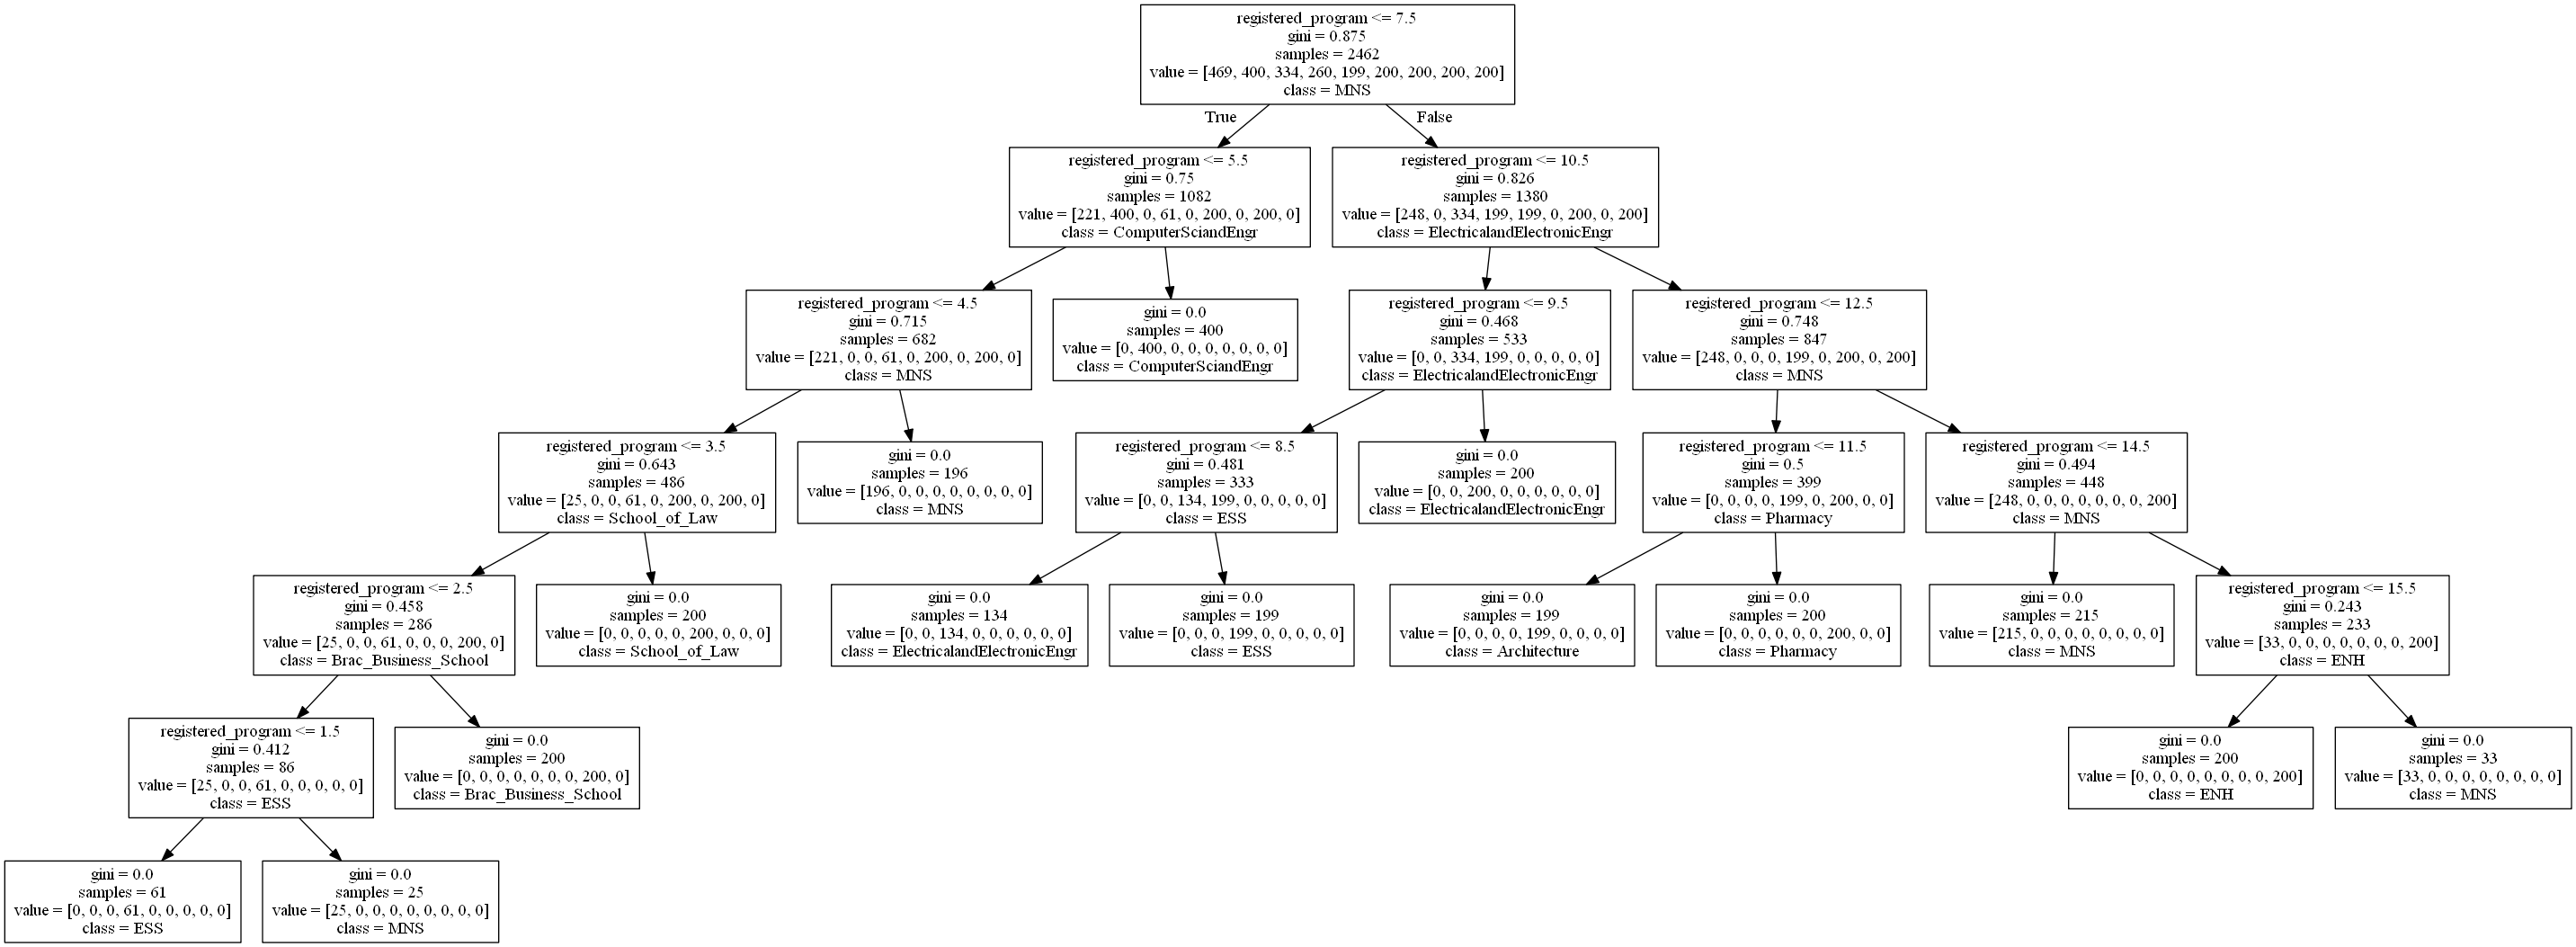

In [75]:
clf = DecisionTreeClassifier(criterion = "gini",random_state=0)
# Train model
model = clf.fit(X1, y1)
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x_names,class_names=y_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

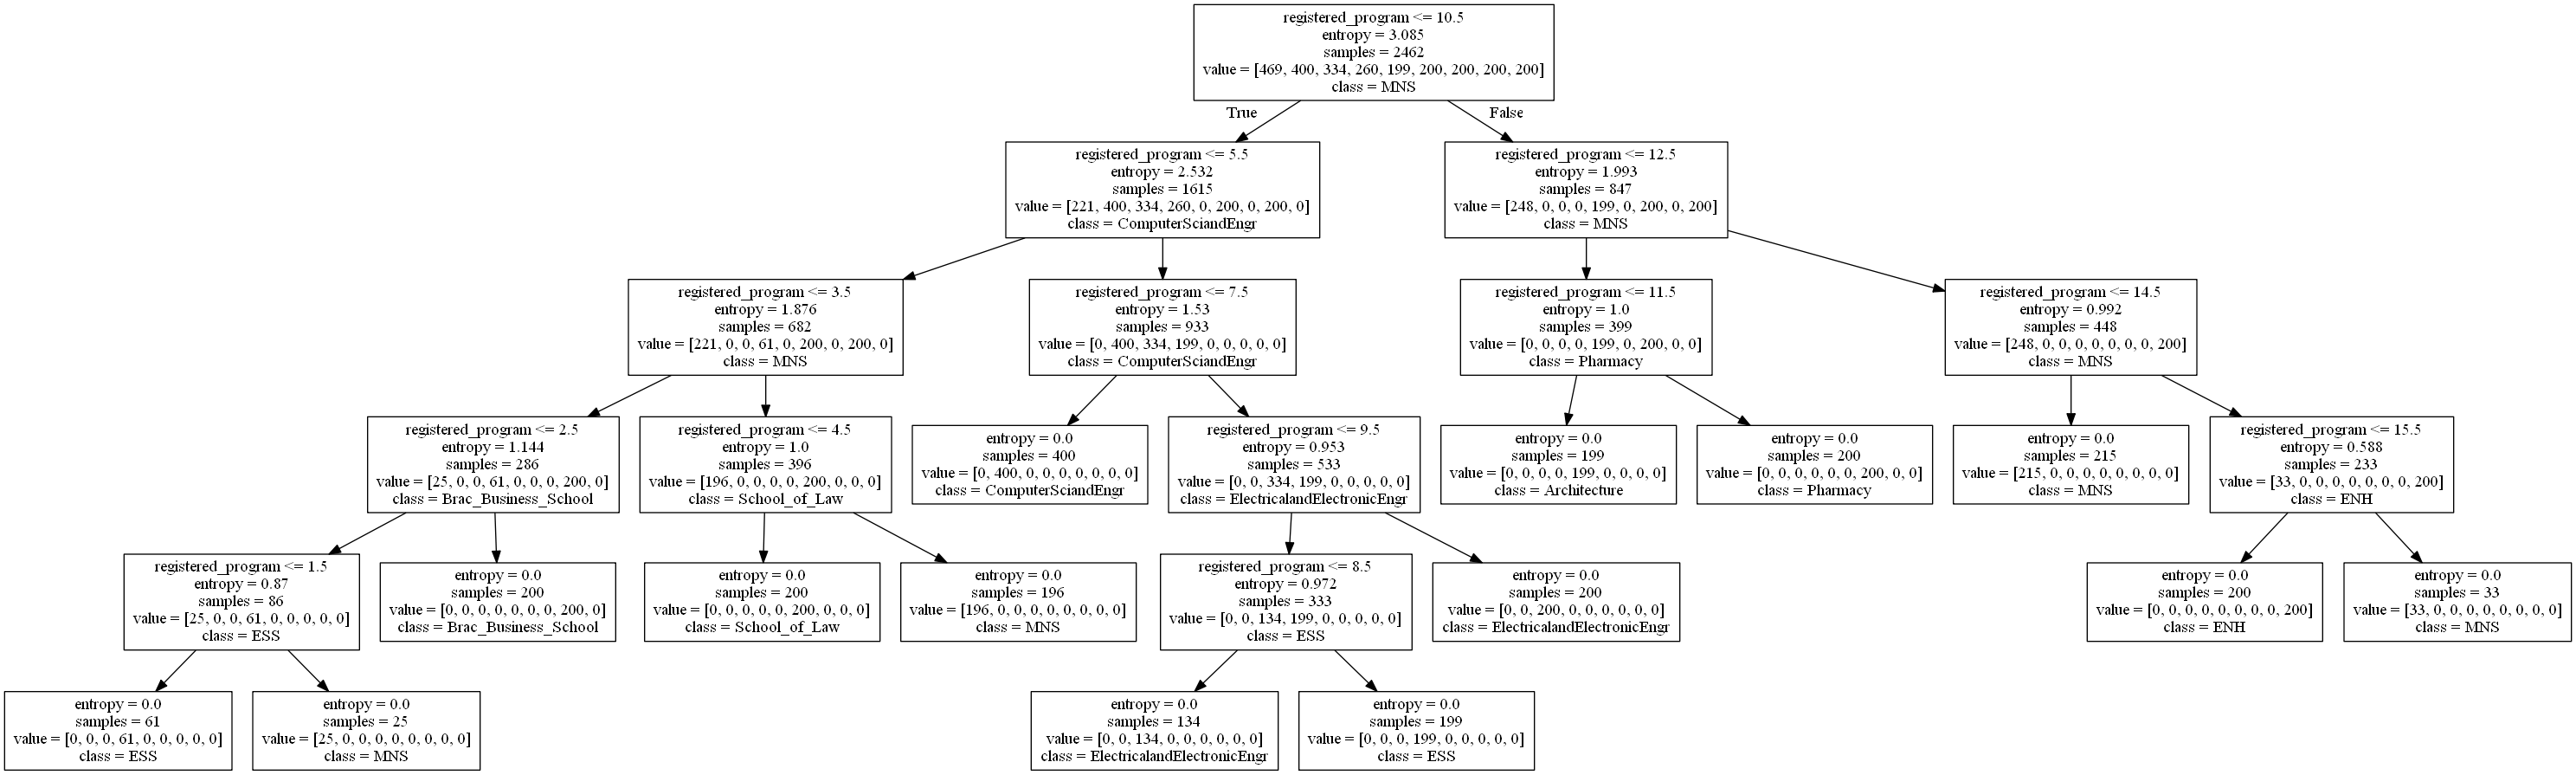

In [76]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state=0)

model = clf_entropy.fit(X1, y1)
# Create DOT data
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=x_names,class_names=y_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())



# Random Forest

In [83]:

i = 1
while i < 30:
  print(i*10)
  clf=RandomForestClassifier(n_estimators=10*i)

#Train the model using the training sets y_pred=clf.predict(X_test)
  clf.fit(X_train,y_train)

  y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
  from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

  i += 1

10
Accuracy: 95.29220779220779
20
Accuracy: 98.53896103896103
30
Accuracy: 98.53896103896103
40
Accuracy: 99.18831168831169
50
Accuracy: 99.02597402597402
60
Accuracy: 99.35064935064936
70
Accuracy: 98.86363636363636
80
Accuracy: 99.02597402597402
90
Accuracy: 99.02597402597402
100
Accuracy: 98.7012987012987
110
Accuracy: 98.86363636363636
120
Accuracy: 99.67532467532467
130
Accuracy: 98.86363636363636
140
Accuracy: 99.35064935064936
150
Accuracy: 98.37662337662337
160
Accuracy: 99.02597402597402
170
Accuracy: 99.35064935064936
180
Accuracy: 99.02597402597402
190
Accuracy: 98.86363636363636
200
Accuracy: 99.02597402597402
210
Accuracy: 98.86363636363636
220
Accuracy: 99.02597402597402
230
Accuracy: 99.02597402597402
240
Accuracy: 99.18831168831169
250
Accuracy: 98.53896103896103
260
Accuracy: 99.02597402597402
270
Accuracy: 99.18831168831169
280
Accuracy: 99.35064935064936
290
Accuracy: 99.35064935064936


# Feature Importance
___________________________________________

# Ranking Techniques
_______________________________________________

* TOPSIS
* AHP
* MCDM : Multiple-criteria decision analysis
* google page rank